# DAT405 Introduction to Data Science and AI 
## Assignment 7: Neural Networks using Keras and Tensorflow 

### Francisco Boudagh
### Jakob Engström
### 2023 May 17

Tensorflow needs to be installed in order to run this code.

In [1]:
from __future__ import print_function
from keras import utils as np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow
import tensorflow as tf
import keras
from keras import regularizers
from matplotlib import pyplot as plt
import numpy as np

In [11]:
# Hyperparameters data-loading and formatting
batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)

In [13]:
## Define model and layers
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4800 - accuracy: 0.8653 - val_loss: 0.2592 - val_accuracy: 0.9251
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2222 - accuracy: 0.9350 - val_loss: 0.1837 - val_accuracy: 0.9448
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1715 - accuracy: 0.9499 - val_loss: 0.1497 - val_accuracy: 0.9565
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1413 - accuracy: 0.9583 - val_loss: 0.1368 - val_accuracy: 0.9573
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1207 - accuracy: 0.9651 - val_loss: 0.1186 - val_accuracy: 0.9629
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1050 - accuracy: 0.9685 - val_loss: 0.1135 - val_accuracy: 0.9630
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0929 - accuracy: 0.9726 - val_loss: 0.1054 - val_accuracy: 0.9667
Epoch 

--------------
## 1 Preprocessing

### 1.1 Explain the prep-rocessing in the code above
The MNIST data is downloaded, so now we have the handwritten digit images and their labels. The data is then separated into training and testing sets. We then convert the data to float32 (a 32 bits long data type which is faster than 64) so we can normalize it later by dividing with 255. Now every pixel will have a value between 0 and 1. Later we encode the labels of training and testing sets (lbl_train and lbl_test) to "one-hot" vectors. This means to vectors that are num_classes-long and have elements with value 0 everywhere except for the class index position which have a value of 1. So for example the digit 5 would be encoded as [0 0 0 0 0 1 0 0 0 0]. In this case, a vector that is 10-long and element number 6 (since element number 1 is for digit 0) have the value 1 and rest is 0.

---------------------
## 2 Network model, training, and changing hyper-parameters

### 2.1 Network properties


The network has 4 layers: 1 input, 2 hidden, and 1 output layer.

The input layer receives images of size 28x28 pixels (784 neurons) and passes the input to the first hidden layer, which has 64 neurons. It then continue to the second hidden layer, also with 64 neurons, and finally to the output layer, which has 10 neurons beacuse the output could be 10 possible digits, 0-9.

The two hidden layers are using activation function ReLU which is appropriate since it introduces non linearity to the model. This allows the model to capture complex relationships between the input and output. The output function is using softmax as activation function which is commonly used for multi class classification problems. Softmax generates a probability distributed over the classes, and it chooses the class with highest probability as output.

Total neurons = 28\*28 + 64 + 64 + 10 = 922.

Total parameters = 

28\*28\*64 + 64 = 50 240,

64\*64 + 64 = 4 160,

64\*10 + 10 = 650,

50 240 + 4 160 + 650 = 55 050

### 2.2 Loss function

The loss function used is categorical cross-entropy, which measures the difference between the true label and the predicted probability calculated by the model.

The mathematical expression for the loss function is:
$Loss = -\sum_{i=1}^{N}y_{true}\cdot \mathrm{log}({y_{pred}})$

Where $N$ represents the number of classes, which is 10 in our case. $y_{true}$ is the true label for a class, and $y_{pred}$ is the predicted label for the same class.

A small loss from the function indicates that the predicted number is close to the true label of the input value. Therefore, we aim for as small losses as possible. Loss = 0 means that the model is predicting the exact value.

The cross-entropy loss function is suitable since it is a standard loss function for multi class tasks, which our task involves. When the loss from the function is small, the model assigns higher probability to the correct class and lower probability to the incorrect classes, thereby improving the model's accuracy.

### 2.3 Training for 10 epochs

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4926 - accuracy: 0.8578 - val_loss: 0.2605 - val_accuracy: 0.9247
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2277 - accuracy: 0.9336 - val_loss: 0.1901 - val_accuracy: 0.9421
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1774 - accuracy: 0.9479 - val_loss: 0.1522 - val_accuracy: 0.9537
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1453 - accuracy: 0.9576 - val_loss: 0.1333 - val_accuracy: 0.9606
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1255 - accuracy: 0.9633 - val_loss: 0.1234 - val_accuracy: 0.9604
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1092 - accuracy: 0.9679 - val_loss: 0.1119 - val_accuracy: 0.9665
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0979 - accuracy: 0.9709 - val_loss: 0.1098 - val_accuracy: 0.9655
Epoch 

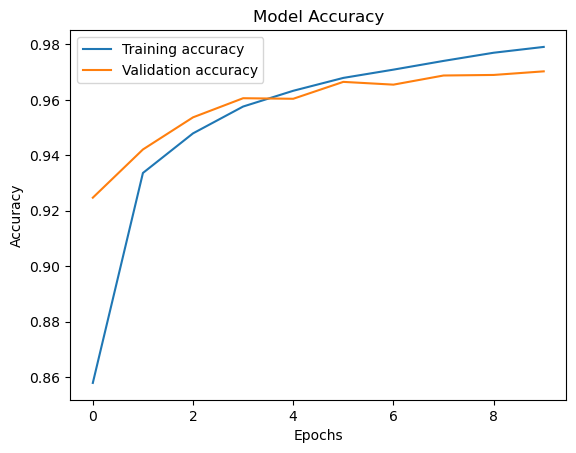

In [22]:
# Define model and layers
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
              metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(score[0], score[1]))

# plotting accuracies
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend((['Training accuracy', 'Validation accuracy']), loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### 2.4 More neurons and epochs with L2 regularization

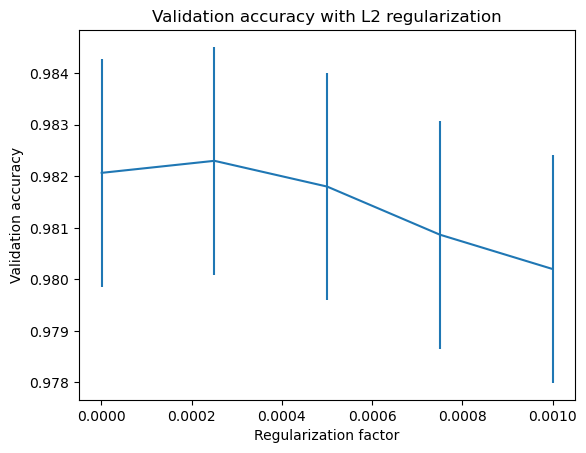

In [6]:
# Hyperparameters and data loading/formatting
batch_size = 128
num_classes = 10
epochs = 40
img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)

# 5 regularization factors from 0.000001 to 0.001 with equal distance
regularization_factors = [0.000001, 0.00025075, 0.0005005, 0.00075025, 0.001]
validation_accuracies = []

for k in range(5):
    replicate_accuracies = []
    for _ in range(3):   # 3 replicates per regularization
        model = Sequential()
        model.add(Flatten())
        model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(regularization_factors[k])))
        model.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(regularization_factors[k])))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                      metrics=['accuracy'])

        fit_info = model.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             verbose=0,
                             validation_data=(x_test, y_test))

        replicate_accuracies.append(fit_info.history['val_accuracy'][-1])

    validation_accuracies.append(np.mean(replicate_accuracies))

# plot
plt.errorbar(regularization_factors, validation_accuracies, yerr=np.std(replicate_accuracies))
plt.xlabel('Regularization factor')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy with L2 regularization')
plt.show()

We are a bit below the optimal claimed accuracy (98.47%). The difference could depend on having different number of epochs, layers, neurons and learning rate.

## 3 Convolutional layers

### 3.1 Design a model that makes use of at least one convolutional layer

In [7]:
# Hyperparameters and data loading/formatting
batch_size = 128
num_classes = 10
epochs = 40
img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = lbl_train
y_test = lbl_test

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# model with convolutional layer
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

# accuracy score
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/40
469/469 [==============================] - 16s 34ms/step - loss: 0.2135 - accuracy: 0.9402 - val_loss: 0.0870 - val_accuracy: 0.9735
Epoch 2/40
469/469 [==============================] - 16s 34ms/step - loss: 0.0655 - accuracy: 0.9811 - val_loss: 0.0568 - val_accuracy: 0.9803
Epoch 3/40
469/469 [==============================] - 16s 34ms/step - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0528 - val_accuracy: 0.9824
Epoch 4/40
469/469 [==============================] - 16s 34ms/step - loss: 0.0322 - accuracy: 0.9903 - val_loss: 0.0435 - val_accuracy: 0.9856
Epoch 5/40
469/469 [==============================] - 16s 34ms/step - loss: 0.0247 - accuracy: 0.9925 - val_loss: 0.0515 - val_accuracy: 0.9829
Epoch 6/40
469/469 [==============================] - 16s 35ms/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.0416 - val_accuracy: 0.9864
Epoch 7/40
469/469 [==============================] - 18s 39ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0453 - val_accuracy:

When we train the model for 10 epochs we get an accuracy of 98.4%. If we train it for 40 epochs, the accuracy increases to **98.85%**, which is very close to 99%.

To reach 99% accuracy, one may need to change some hyperparameters like the learning rate, number of epochs, batch size, or trying differen layers in the model.

In this case, we used a convolutional layer because the task required it. We didn't set a specific learning rate ourselves. Instead, we used a optimizer called Adam, which automatically adjusts the learning rate during training. As we have done before, we used again ReLU activation function to capture complexity between the patterns. Loss function categorical cross entropy is suitable since it is a multi class classification task. After some reading, we decided to have MaxPooling2D layer, which basically focuses on the most relevant features and hence reduce overfitting and make the model a bit less computation complex.

### 3.2 Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the application?

**Translation invariance.** This is a very beneficial property of convolutional layers. They can recognize patterns of the digits regardless of the position of the digit in the image. So it doesn't matter where the digits are placed. This is very beneficial since digits can appear at different positions in an image. Fully connected layers do not have this property, hence becoming very sensitive to the digits position in the image.

**Spatial informatio.** The convolutional layer preserves the spatial information of the input data. This means that it can recognize advanced patterns by finding relations to other information in the input data. By doing this, the model can understand patterns like edges and corners of the digits and recognize them when predicting. Buut when using fully connected layers, the input is just a vector, this disregard all the spatial relationships.

**Overfitting reduction.** We achieved this in our case by using MaxPooling, which reduces the spatial dimensions and hence decreases the risk of overfitting. Therefore, in general, convolutional layers are more robust and do not easily become overfitted.

So, in general it is very benefical to use convolutional layers for applications such as digits recognition.